In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output

In [64]:
df = pd.read_csv('Advertising.csv')
print(df)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


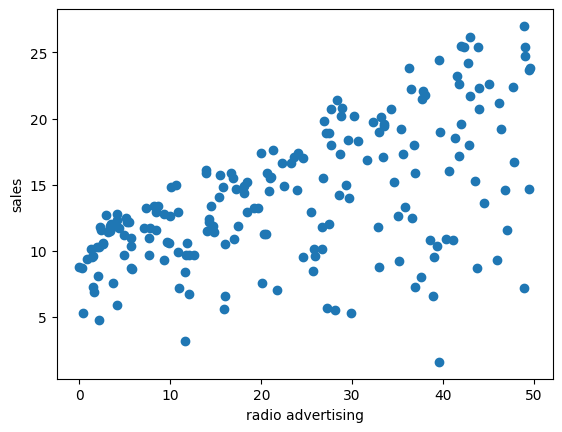

In [65]:
plt.scatter(df['radio'], df['sales'])
plt.xlabel('radio advertising')
plt.ylabel('sales')
plt.show()

Minimize mean squared error using gradient decent
$$ C = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - (wx_{i}+b))^2  $$


$$ \dfrac{\partial C}{\partial w} = \frac{1}{N} \sum_{i=1}^{N} -2x_{i}(y_{i} - (wx_{i}+b))$$
$$ \dfrac{\partial C}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} -2(y_{i} - (wx_{i}+b)) $$

Update $ w, b $

$$ w\leftarrow w-\alpha \dfrac{\partial C}{\partial w} $$
$$ b\leftarrow b-\alpha \dfrac{\partial C}{\partial b} $$

In [66]:
class LinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0
    
    def train(self, x_train, y_train, alpha, iter):
        self.w = np.zeros(shape=(np.shape(x_train)[1],))
        self.b = np.zeros(shape=(1,))
        n = len(x_train)
        for e in range(iter):
            dl_w = 0
            dl_b = 0
            for i in range(n):
                y = self.w @ x_train[i] + self.b
                dl_w += x_train[i]*(y_train[i] - y)
                dl_b += y_train[i] - y

            self.w += 2/n * alpha * dl_w
            self.b += 2/n * alpha * dl_b

            clear_output(wait=True)
            loss = self.avg_loss(x_train, y_train)

            display(f"iteration: {e+1}; loss: {loss}")


    def predict(self, x):
        return self.w @ x + self.b

    def avg_loss(self, x_train, y_train):
        return sum([(y_train[i] - self.predict(x_train[i]))**2 for i in range(len(x_train))]) / len(x_train)

In [67]:
linreg = LinearRegression()

x_train = df[['radio']].to_numpy()
y_train = df['sales']

linreg.train(x_train, y_train, 0.001, 5000)

'iteration: 5000; loss: [18.17063228]'

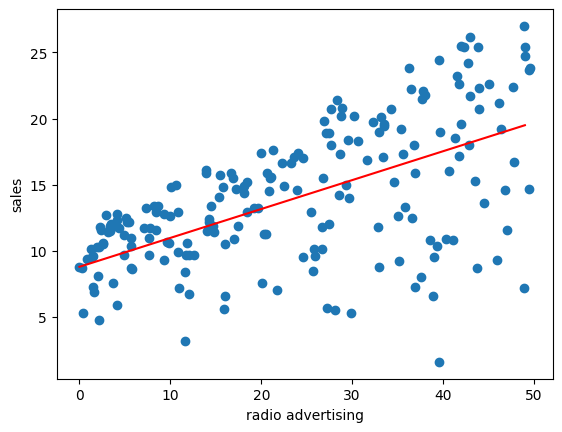

In [68]:
max = int(np.max(x_train))
x = np.linspace(0, max, 2)
y = [linreg.predict([v]) for v in x]
plt.scatter(x_train, y_train)
plt.plot(x, y, color='red')
plt.xlabel('radio advertising')
plt.ylabel('sales')
plt.show()

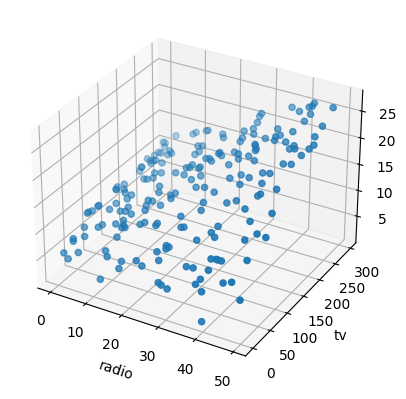

In [69]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set(xlabel='radio', ylabel='tv', zlabel='sales')
ax.scatter(df['radio'], df['TV'], df['sales'])

In [70]:
linreg = LinearRegression()

x_train = df[['TV', 'radio']].to_numpy()
y_train = df['sales'].to_numpy()

linreg.train(x_train, y_train, 0.00001, 2000)

'iteration: 2000; loss: [4.15352588]'